In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import sys
import os
from matplotlib import pyplot as plt
from pprint import pprint
from intake import open_esm_datastore
import pandas as pd
import cftime
tool_dir = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore'
sys.path.append(tool_dir)
from common_functions import _expt_name_combo, _read_ryaml, plot_time_series_combo, plot_time_series_combo2, _set_default_plt_params, plot2d, plot3d,plot3d2,plot3d3


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
yaml_input = 'Expts_manager_10_year_insan_runs_longer.yaml'
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
MOM_contrl_dir = yaml_input['base_dir_name']
contrl_name = 'DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0'

MOM_expt_dir1 = yaml_input['namelists']['MOM_input']['MOM_input_dir1']
MOM_list1_combo = yaml_input['namelists']['MOM_input']['MOM_list1_combo']
expt_names = _expt_name_combo(MOM_list1_combo)

MOM_dirs = [MOM_contrl_dir]+list(MOM_expt_dir1)
MOM_names = [contrl_name] + list(expt_names)
#MOM_dirs = list(MOM_expt_dir1)
#MOM_names = list(expt_names)

output_expt_path = '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/product_1_instan_short_runs/product1'
intake_esm_ds = 'intake_esm_ds.json'

datastore_tot = []
MOM_dirs_tot = []
MOM_names_tot = []
for i,j in zip(MOM_dirs,MOM_names):
    archive_path = os.path.join(f"{output_expt_path}",f"{i}","archive")
    datastore_path = os.path.join(f"{archive_path}",intake_esm_ds)
    if os.path.isfile(datastore_path):
        datastore = open_esm_datastore(datastore_path,columns_with_iterables=["variable"])
        datastore_tot.append(datastore)
        MOM_dirs_tot.append(f"{i}")
        MOM_names_tot.append(f"{j}")
pprint(MOM_dirs_tot)
pprint(MOM_names_tot)
pprint(datastore_tot)

# reorder based on MOM_names_tot
# extracted_MOM_names_tot = ['_'.join(i.split('_')[:3]) for i in MOM_names_tot]
# extracted_MOM_names_tot[0] = 'Contrl_DT_THERM_1800'
# extracted_MOM_names_tot

['Ctrl-1deg_jra55do_ryf2',
 'lexpt7',
 'lexpt9',
 'lexpt11',
 'lexpt13',
 'lexpt15',
 'lexpt16',
 'lexpt17']
['DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0',
 'DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_54000',
 'DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_36000',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_18000',
 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_7200',
 'DT_THERM_10800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_10800',
 'DT_THERM_14400_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_14400',
 'DT_THERM_3600_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_3600']
[<intake_esm_ds catalog with 4594 dataset(s) from 5976 asset(s)>,
 <intake_esm_ds catalog with 2684 dataset(s) from 3622 asset(s)>,
 <intake_esm_ds catalog with 2684 datase

In [5]:
# Function to extract the numerical value after 'DT_THERM'
def extract_dt_therm_value(config):
    parts = config.split('_')
    for i, part in enumerate(parts):
        if part == 'DT' and i + 1 < len(parts) and 'THERM' in parts[i + 1]:
            try:
                # Extract the number after 'THERM' and convert to integer
                value = int(parts[i + 2])
                return value
            except ValueError:
                # Handle cases where the replacement results in an invalid integer
                print(f"Invalid integer conversion for config: {config}")
                return float('inf')  # Use a high value to sort problematic entries last
    return float('inf')  # Return a high value if pattern not found

# Combine the configs, names, and datasets into a list of tuples
combined = list(zip(MOM_names_tot, MOM_dirs_tot, datastore_tot))

# Sort the combined list based on the numerical values extracted from configs
sorted_combined = sorted(combined, key=lambda x: extract_dt_therm_value(x[0]))

# Separate the sorted names and datasets from the sorted combined list
sorted_dirs = [name for name, _ , _ in sorted_combined]
sorted_names = [name for _, name, _ in sorted_combined]
sorted_datasets = [dataset for _, _, dataset in sorted_combined]

rev_sorted_dirs = sorted_dirs[::-1]
rev_sorted_names = sorted_names[::-1]
rev_sorted_datasets = sorted_datasets[::-1]
# Print the sorted associated names and intake datasets
print("Sorted Names:")
for name in sorted_names:
    print(name)

for name in sorted_dirs:
    print(name)

print("\nSorted Intake Datasets:")
for dataset in sorted_datasets:
    print(dataset)

extracted_MOM_names_tot = ['_'.join(i.split('_')[:3]) for i in rev_sorted_dirs]
extracted_MOM_names_tot[-1] = 'Contrl_DT_THERM_1800'
extracted_MOM_names_tot

Sorted Names:
Ctrl-1deg_jra55do_ryf2
lexpt17
lexpt13
lexpt15
lexpt16
lexpt11
lexpt9
lexpt7
DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0
DT_THERM_3600_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_3600
DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_7200
DT_THERM_10800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_10800
DT_THERM_14400_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_14400
DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_18000
DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_36000
DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_54000

Sorted Intake Datasets:
<intake_esm_ds catalog with 4594 dataset(s) from 5976 asset(s)>
<intake_esm_ds catalog with 2704 dataset(s) from 3642 asset(s)>
<intake_esm_ds catalog with 2684 dataset(s) from 3622 asset(s)>
<inta

['DT_THERM_54000',
 'DT_THERM_36000',
 'DT_THERM_18000',
 'DT_THERM_14400',
 'DT_THERM_10800',
 'DT_THERM_7200',
 'DT_THERM_3600',
 'Contrl_DT_THERM_1800']

[0, 1, 2, 3, 4, 5, 6, 7]


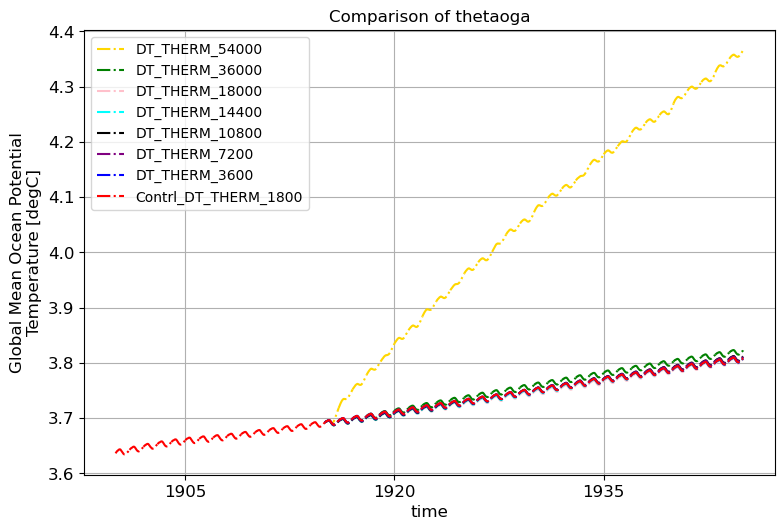

In [7]:
var = 'thetaoga'
#line_style = ['-','--','-.',':']
line_style = ['-.']
line_color = ['gold','green' ,'pink','cyan','black','purple','blue','red']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': None, 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots_longer/thetaoga.png'
plot_time_series_combo2(rev_sorted_datasets,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

[1, 2, 3, 4, 5, 6, 7]


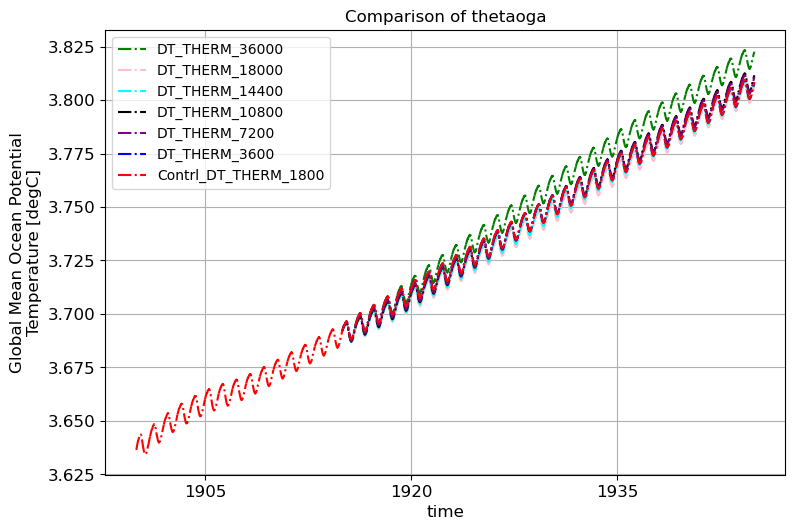

In [8]:
var = 'thetaoga'
#line_style = ['-','--','-.',':']
line_style = ['-.']
line_color = ['gold','green' ,'pink','cyan','black','purple','blue','red']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': list(range(1,8)), 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots_longer/thetaoga2.png'
plot_time_series_combo2(rev_sorted_datasets,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

[2, 3, 4, 5, 6, 7]


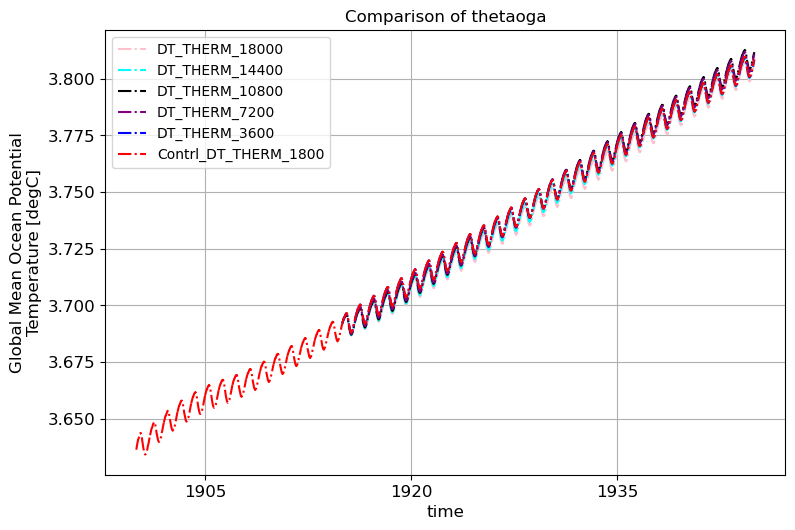

In [12]:
var = 'thetaoga'
#line_style = ['-','--','-.',':']
line_style = ['-.']
line_color = ['gold','green' ,'pink','cyan','black','purple','blue','red']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': list(range(2,8)), 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots_longer/thetaoga3.png'
plot_time_series_combo2(rev_sorted_datasets,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

[3, 4, 5, 6, 7]


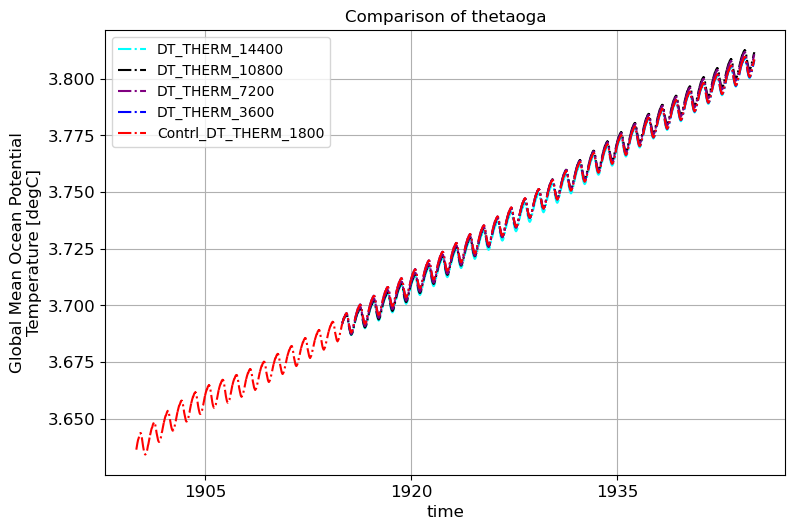

In [13]:
var = 'thetaoga'
#line_style = ['-','--','-.',':']
line_style = ['-.']
line_color = ['gold','green' ,'pink','cyan','black','purple','blue','red']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': list(range(3,8)), 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots_longer/thetaoga4.png'
plot_time_series_combo2(rev_sorted_datasets,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

[4, 5, 6, 7]


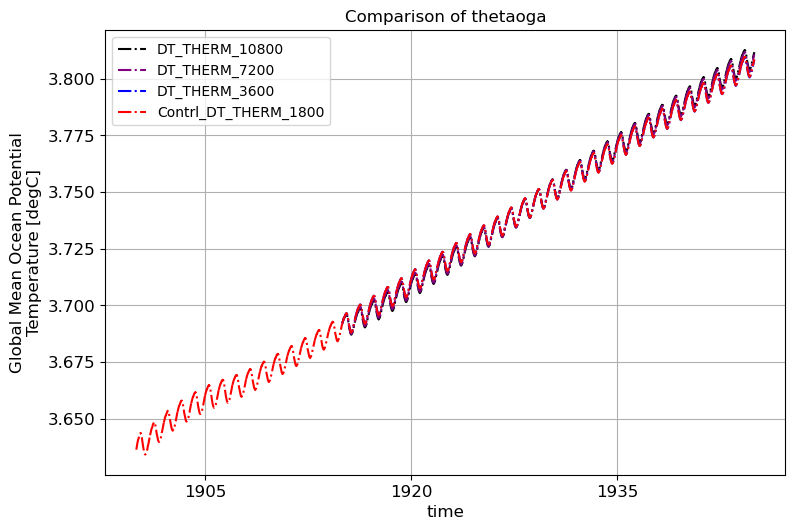

In [14]:
var = 'thetaoga'
#line_style = ['-','--','-.',':']
line_style = ['-.']
line_color = ['gold','green' ,'pink','cyan','black','purple','blue','red']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': list(range(4,8)), 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots_longer/thetaoga5.png'
plot_time_series_combo2(rev_sorted_datasets,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

[5, 6, 7]


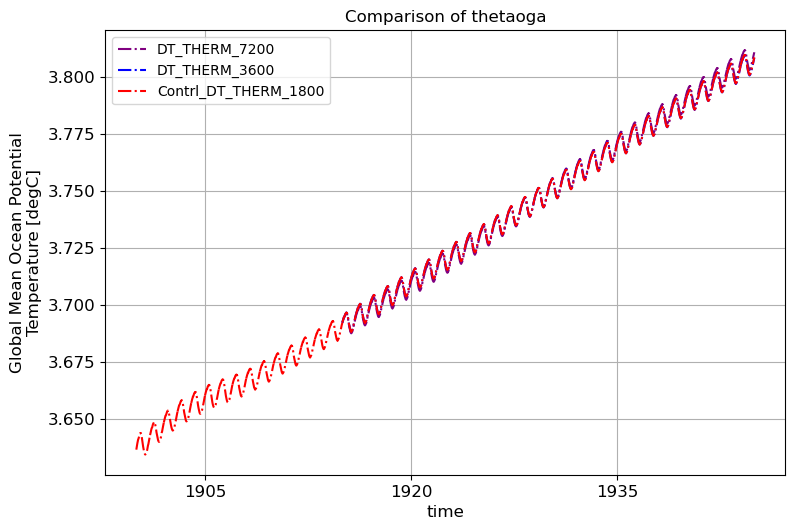

In [15]:
var = 'thetaoga'
#line_style = ['-','--','-.',':']
line_style = ['-.']
line_color = ['gold','green' ,'pink','cyan','black','purple','blue','red']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': list(range(5,8)), 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots_longer/thetaoga6.png'
plot_time_series_combo2(rev_sorted_datasets,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

[0, 1, 2, 3, 4, 5, 6, 7]


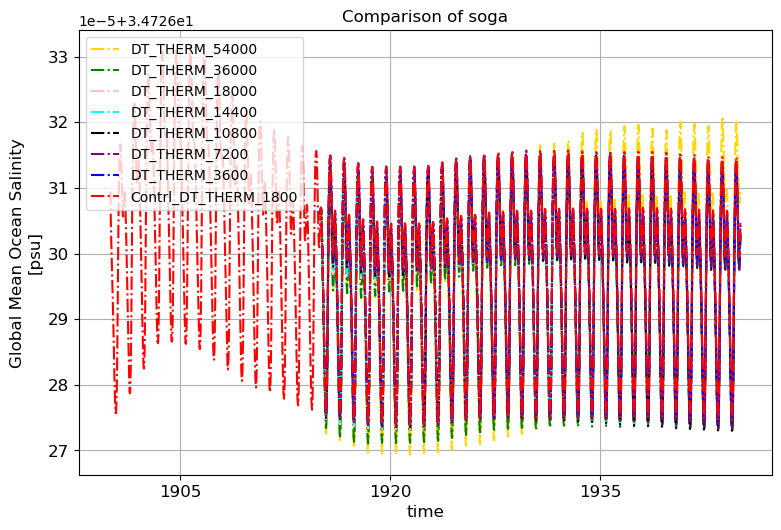

In [16]:
var = 'soga'
#line_style = ['-','--','-.',':']
line_style = ['-.']
line_color = ['gold','green' ,'pink','cyan','black','purple','blue','red']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': None, 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots_longer/soga.png'
plot_time_series_combo2(rev_sorted_datasets,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

[1, 2, 3, 4, 5, 6, 7]


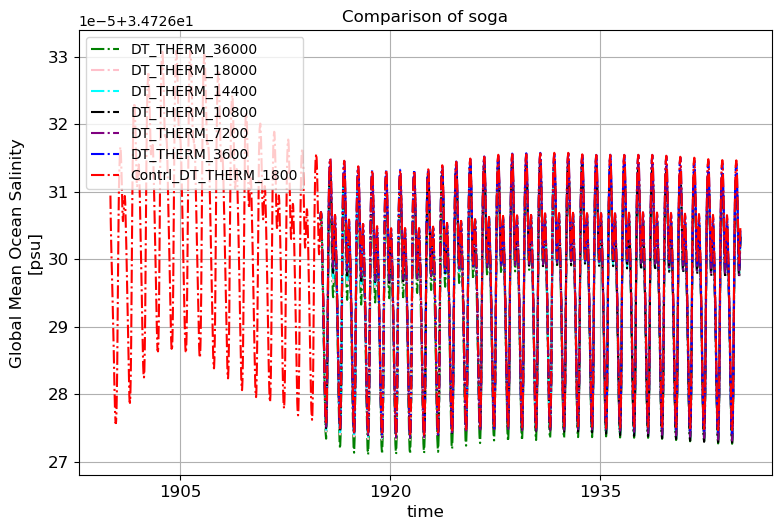

In [17]:
var = 'soga'
#line_style = ['-','--','-.',':']
line_style = ['-.']
line_color = ['gold','green' ,'pink','cyan','black','purple','blue','red']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': list(range(1,8)), 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots_longer/soga2.png'
plot_time_series_combo2(rev_sorted_datasets,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

[2, 3, 4, 5, 6, 7]


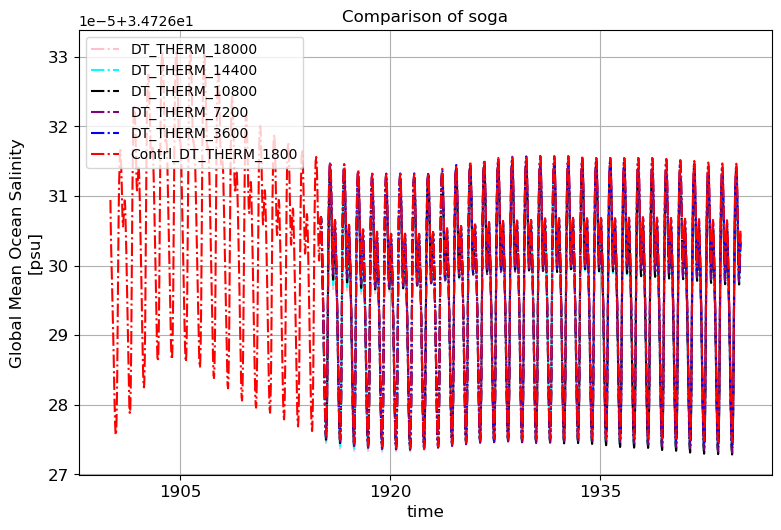

In [18]:
var = 'soga'
#line_style = ['-','--','-.',':']
line_style = ['-.']
line_color = ['gold','green' ,'pink','cyan','black','purple','blue','red']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': list(range(2,8)), 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots_longer/soga3.png'
plot_time_series_combo2(rev_sorted_datasets,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

0
<xarray.Dataset> Size: 233MB
Dimensions:   (time: 540, yh: 300, xq: 360)
Coordinates:
  * xq        (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh        (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * time      (time) object 4kB 1900-01-16 12:00:00 ... 1944-12-16 12:00:00
Data variables:
    T_adx_2d  (time, yh, xq) float32 233MB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
Attributes: (12/19)
    NumFilesInSet:                            1
    title:                                    ACCESS-OM3
    grid_type:                                regular
    grid_tile:                                N/A
    intake_esm_vars:                          ['T_adx_2d']
    intake_esm_attrs:path:                    /g/data/tm70/ml0072/COMMON/git_...
    ...                                       ...
    intake_esm_attrs:variable_cell_methods:   ['yh:sum xq:point time: mean', ...
    intake_esm_attrs:variable_units:          ['W', 'days since 1

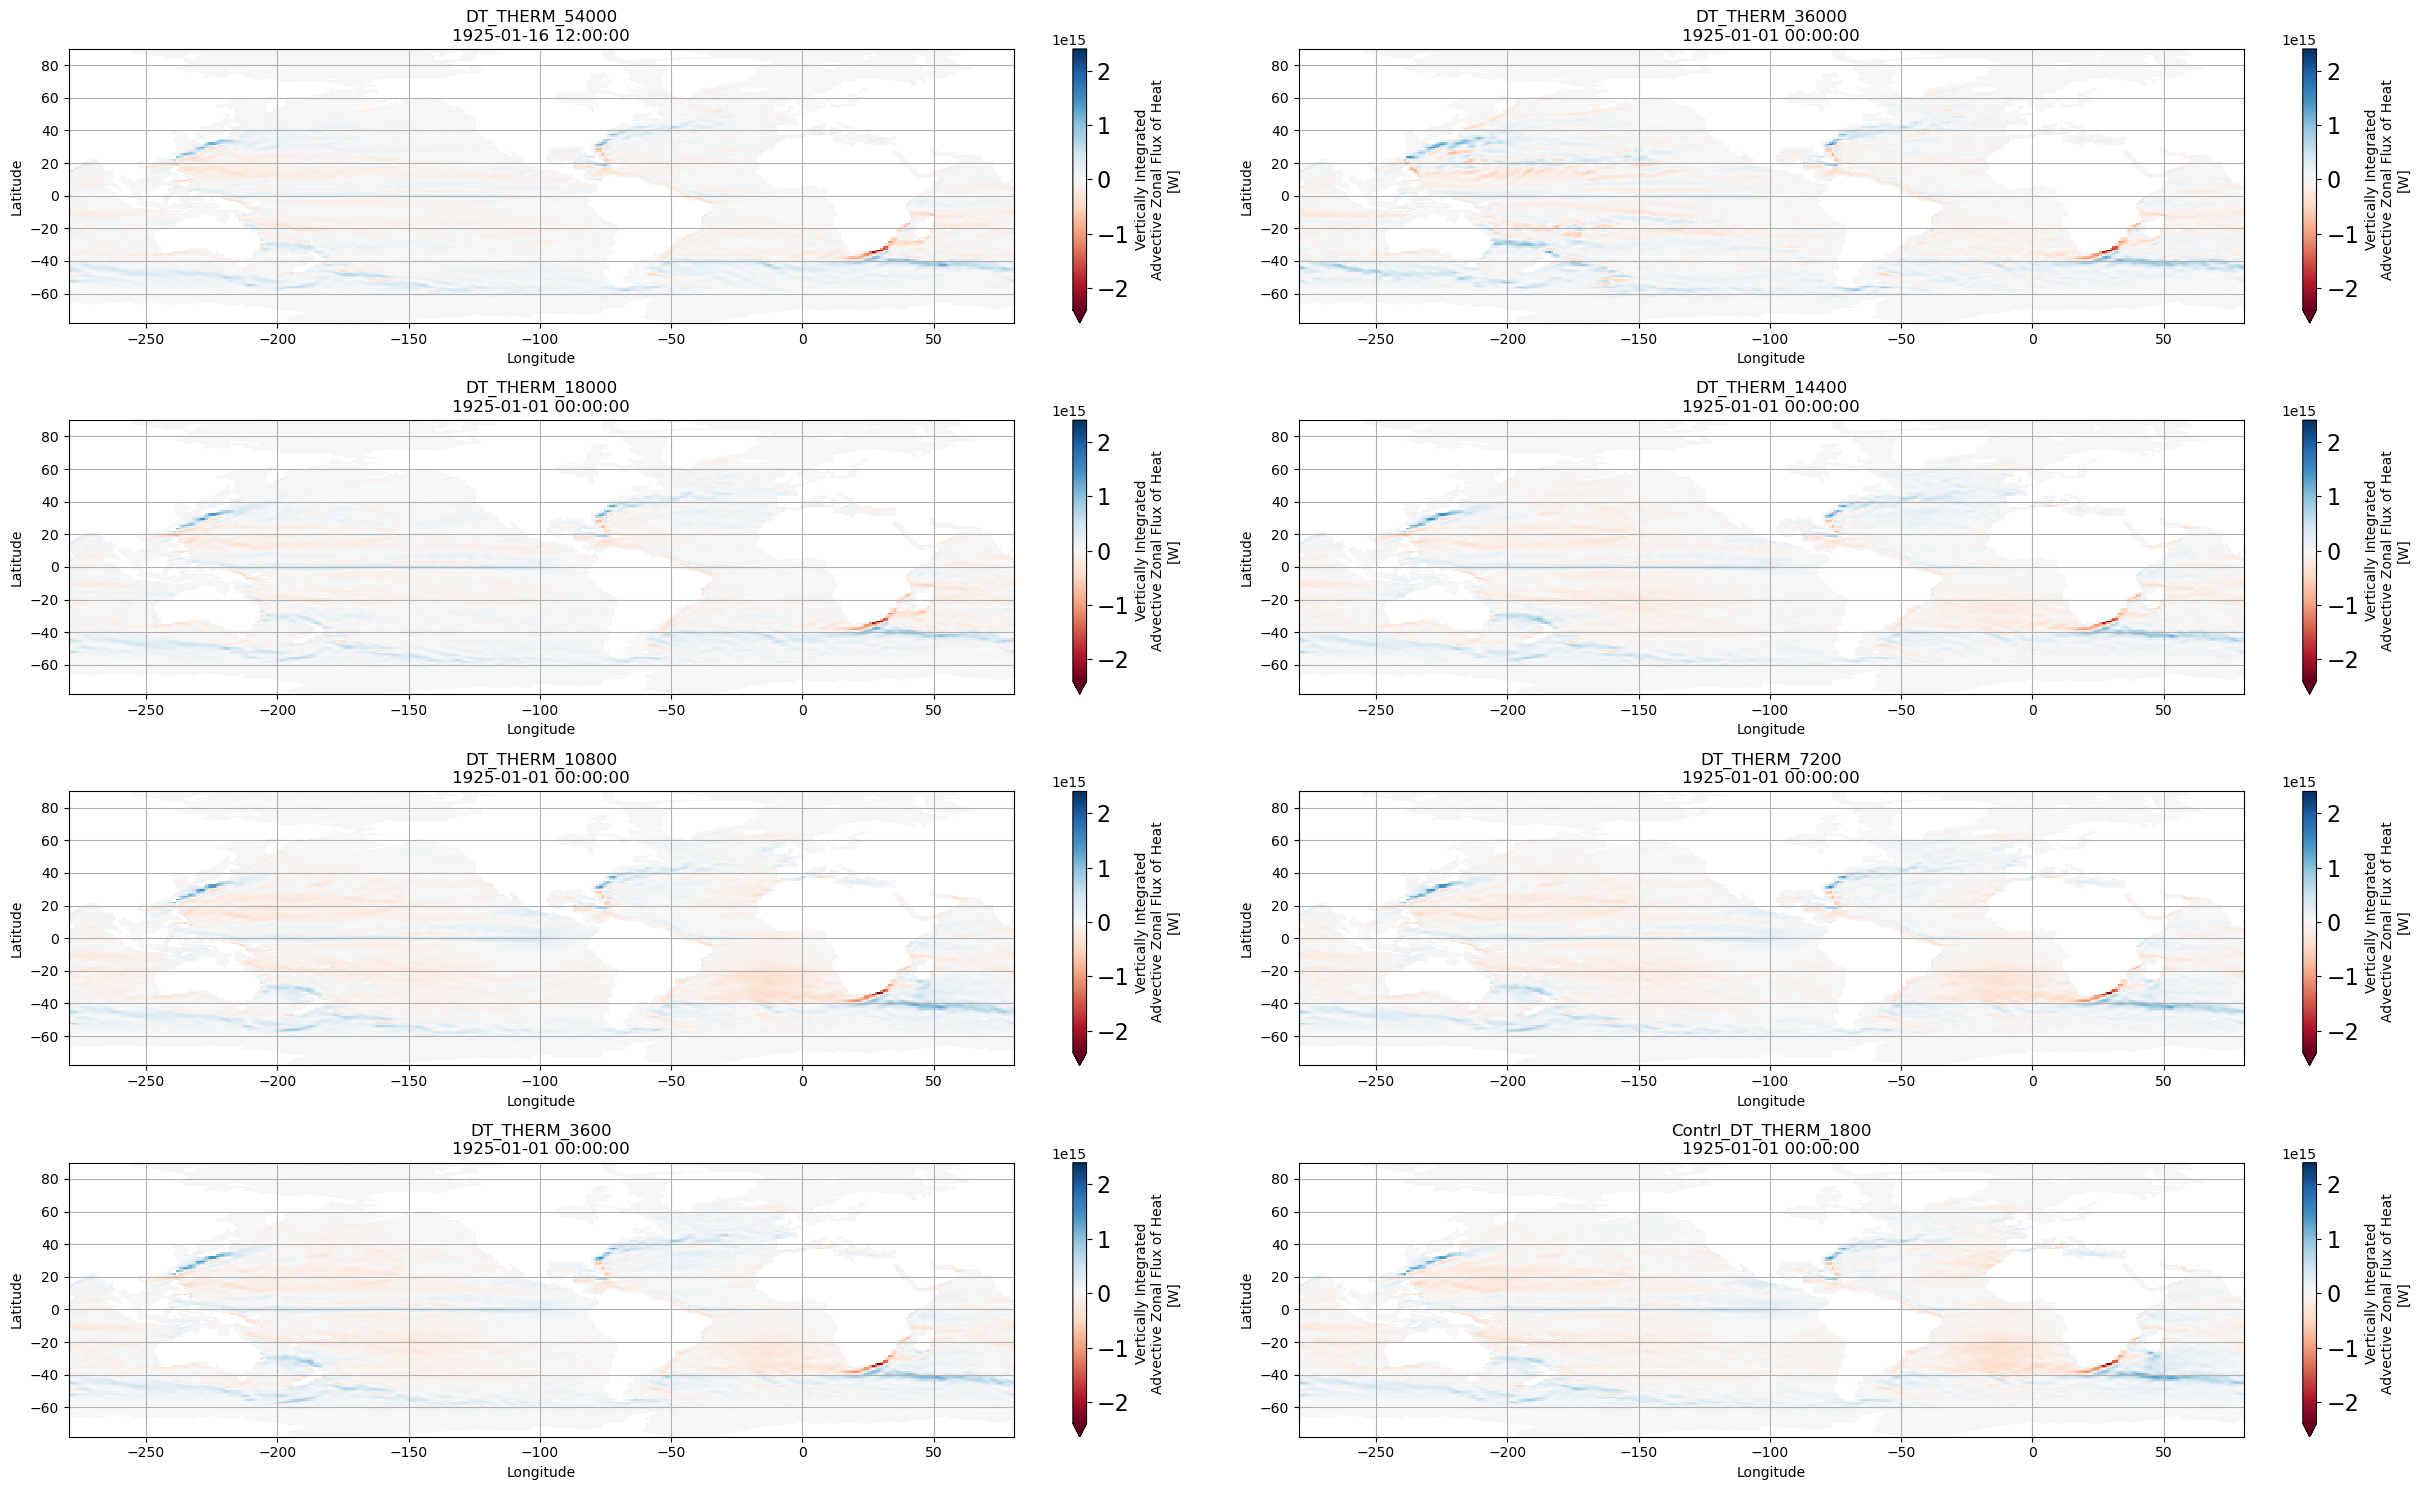

In [25]:
var = 'T_adx_2d'
common_time = pd.Timestamp('1925-01-01 00:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
tmp_indx = list(range(8))
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d3(datastore_expts, MOM_names_expts, var,depth_level = None,
       time_selection = 'index', time_index = -1,common_time = common_time,ncols=2,figsize=(25,15),cbar_range=[-2.4e15,2.4e15])

access_om3_mom6_2d_S_adx_2d_1mon_mean_1900.1mon
<xarray.DataArray 'S_adx_2d' (time: 12, yh: 300, xq: 360)> Size: 5MB
dask.array<open_dataset-S_adx_2d, shape=(12, 300, 360), dtype=float32, chunksize=(1, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh       (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * time     (time) object 96B 1900-01-16 12:00:00 ... 1900-12-16 12:00:00
Attributes:
    units:          psu m3 s-1
    long_name:      Vertically Integrated Advective Zonal Flux of Salt
    cell_methods:   yh:sum xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none
access_om3_mom6_2d_S_adx_2d_1mon_mean_1901.1mon
<xarray.DataArray 'S_adx_2d' (time: 12, yh: 300, xq: 360)> Size: 5MB
dask.array<open_dataset-S_adx_2d, shape=(12, 300, 360), dtype=float32, chunksize=(1, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 3

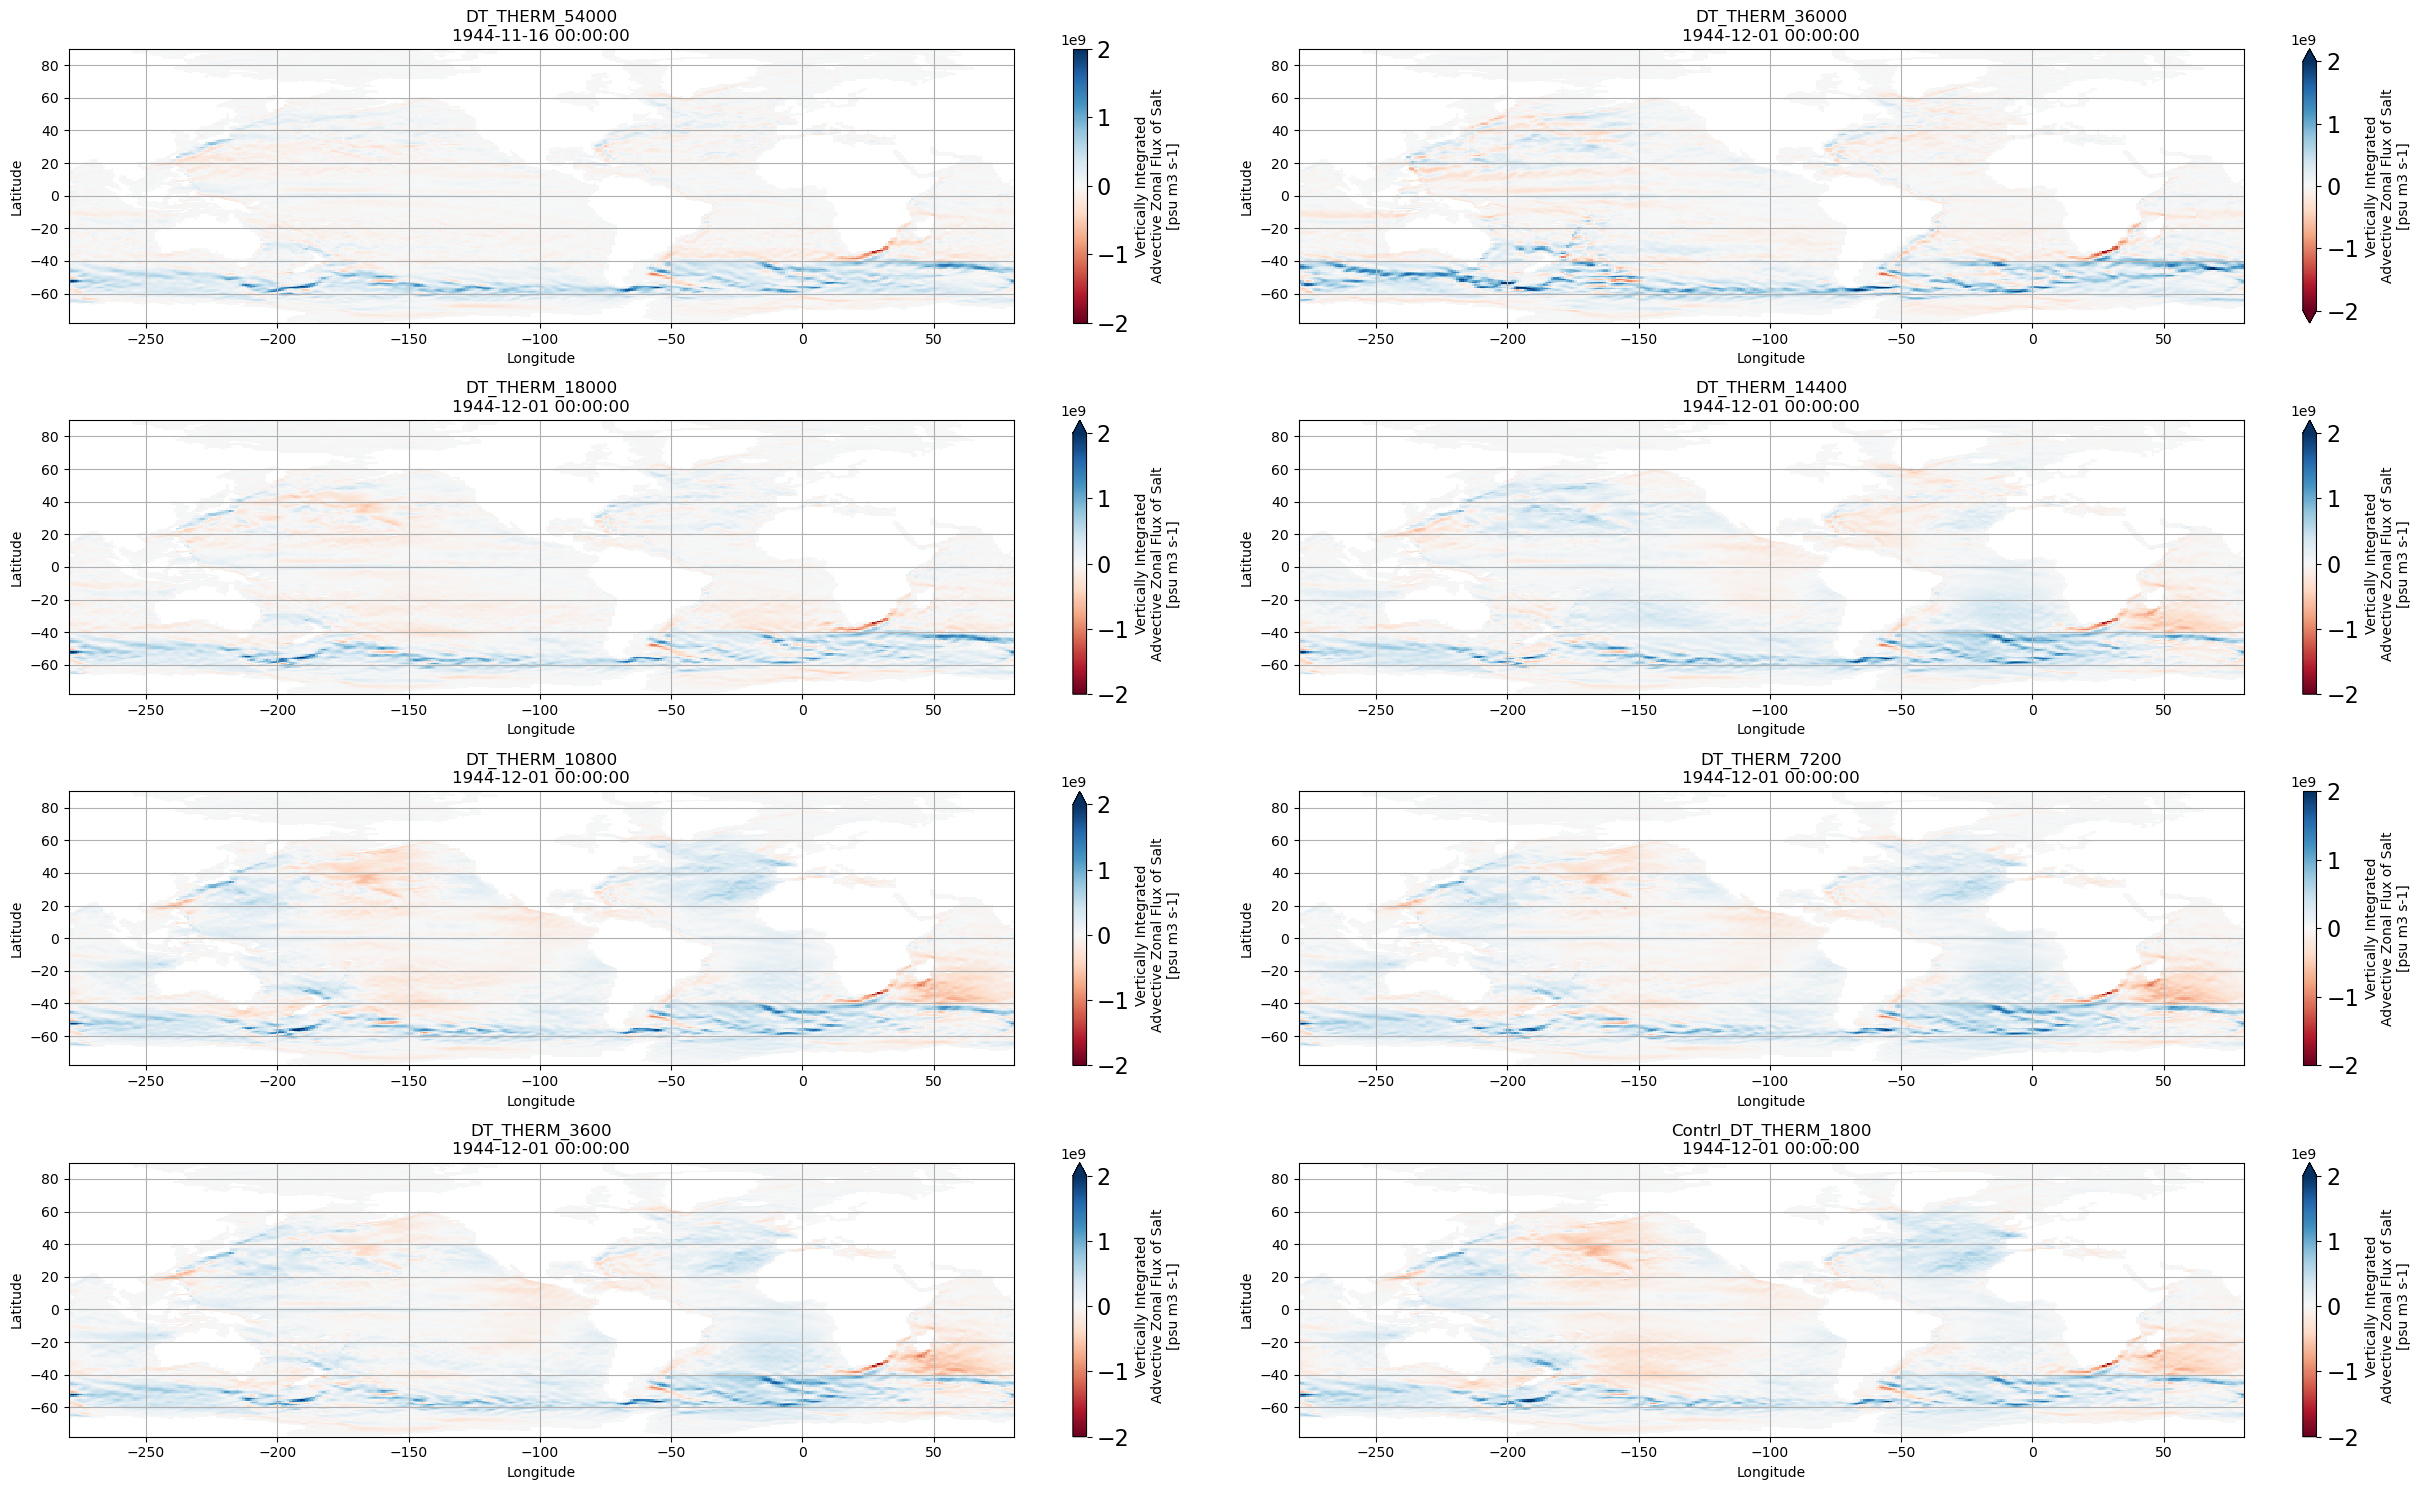

In [19]:
var = 'S_adx_2d'
common_time = pd.Timestamp('1944-12-01 00:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
tmp_indx = list(range(8))
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d2(datastore_expts, MOM_names_expts, var,depth_level = None,
       time_selection = 'index', time_index = -1,common_time = common_time,ncols=2,figsize=(25,15),cbar_range=[-2e9,2e9])

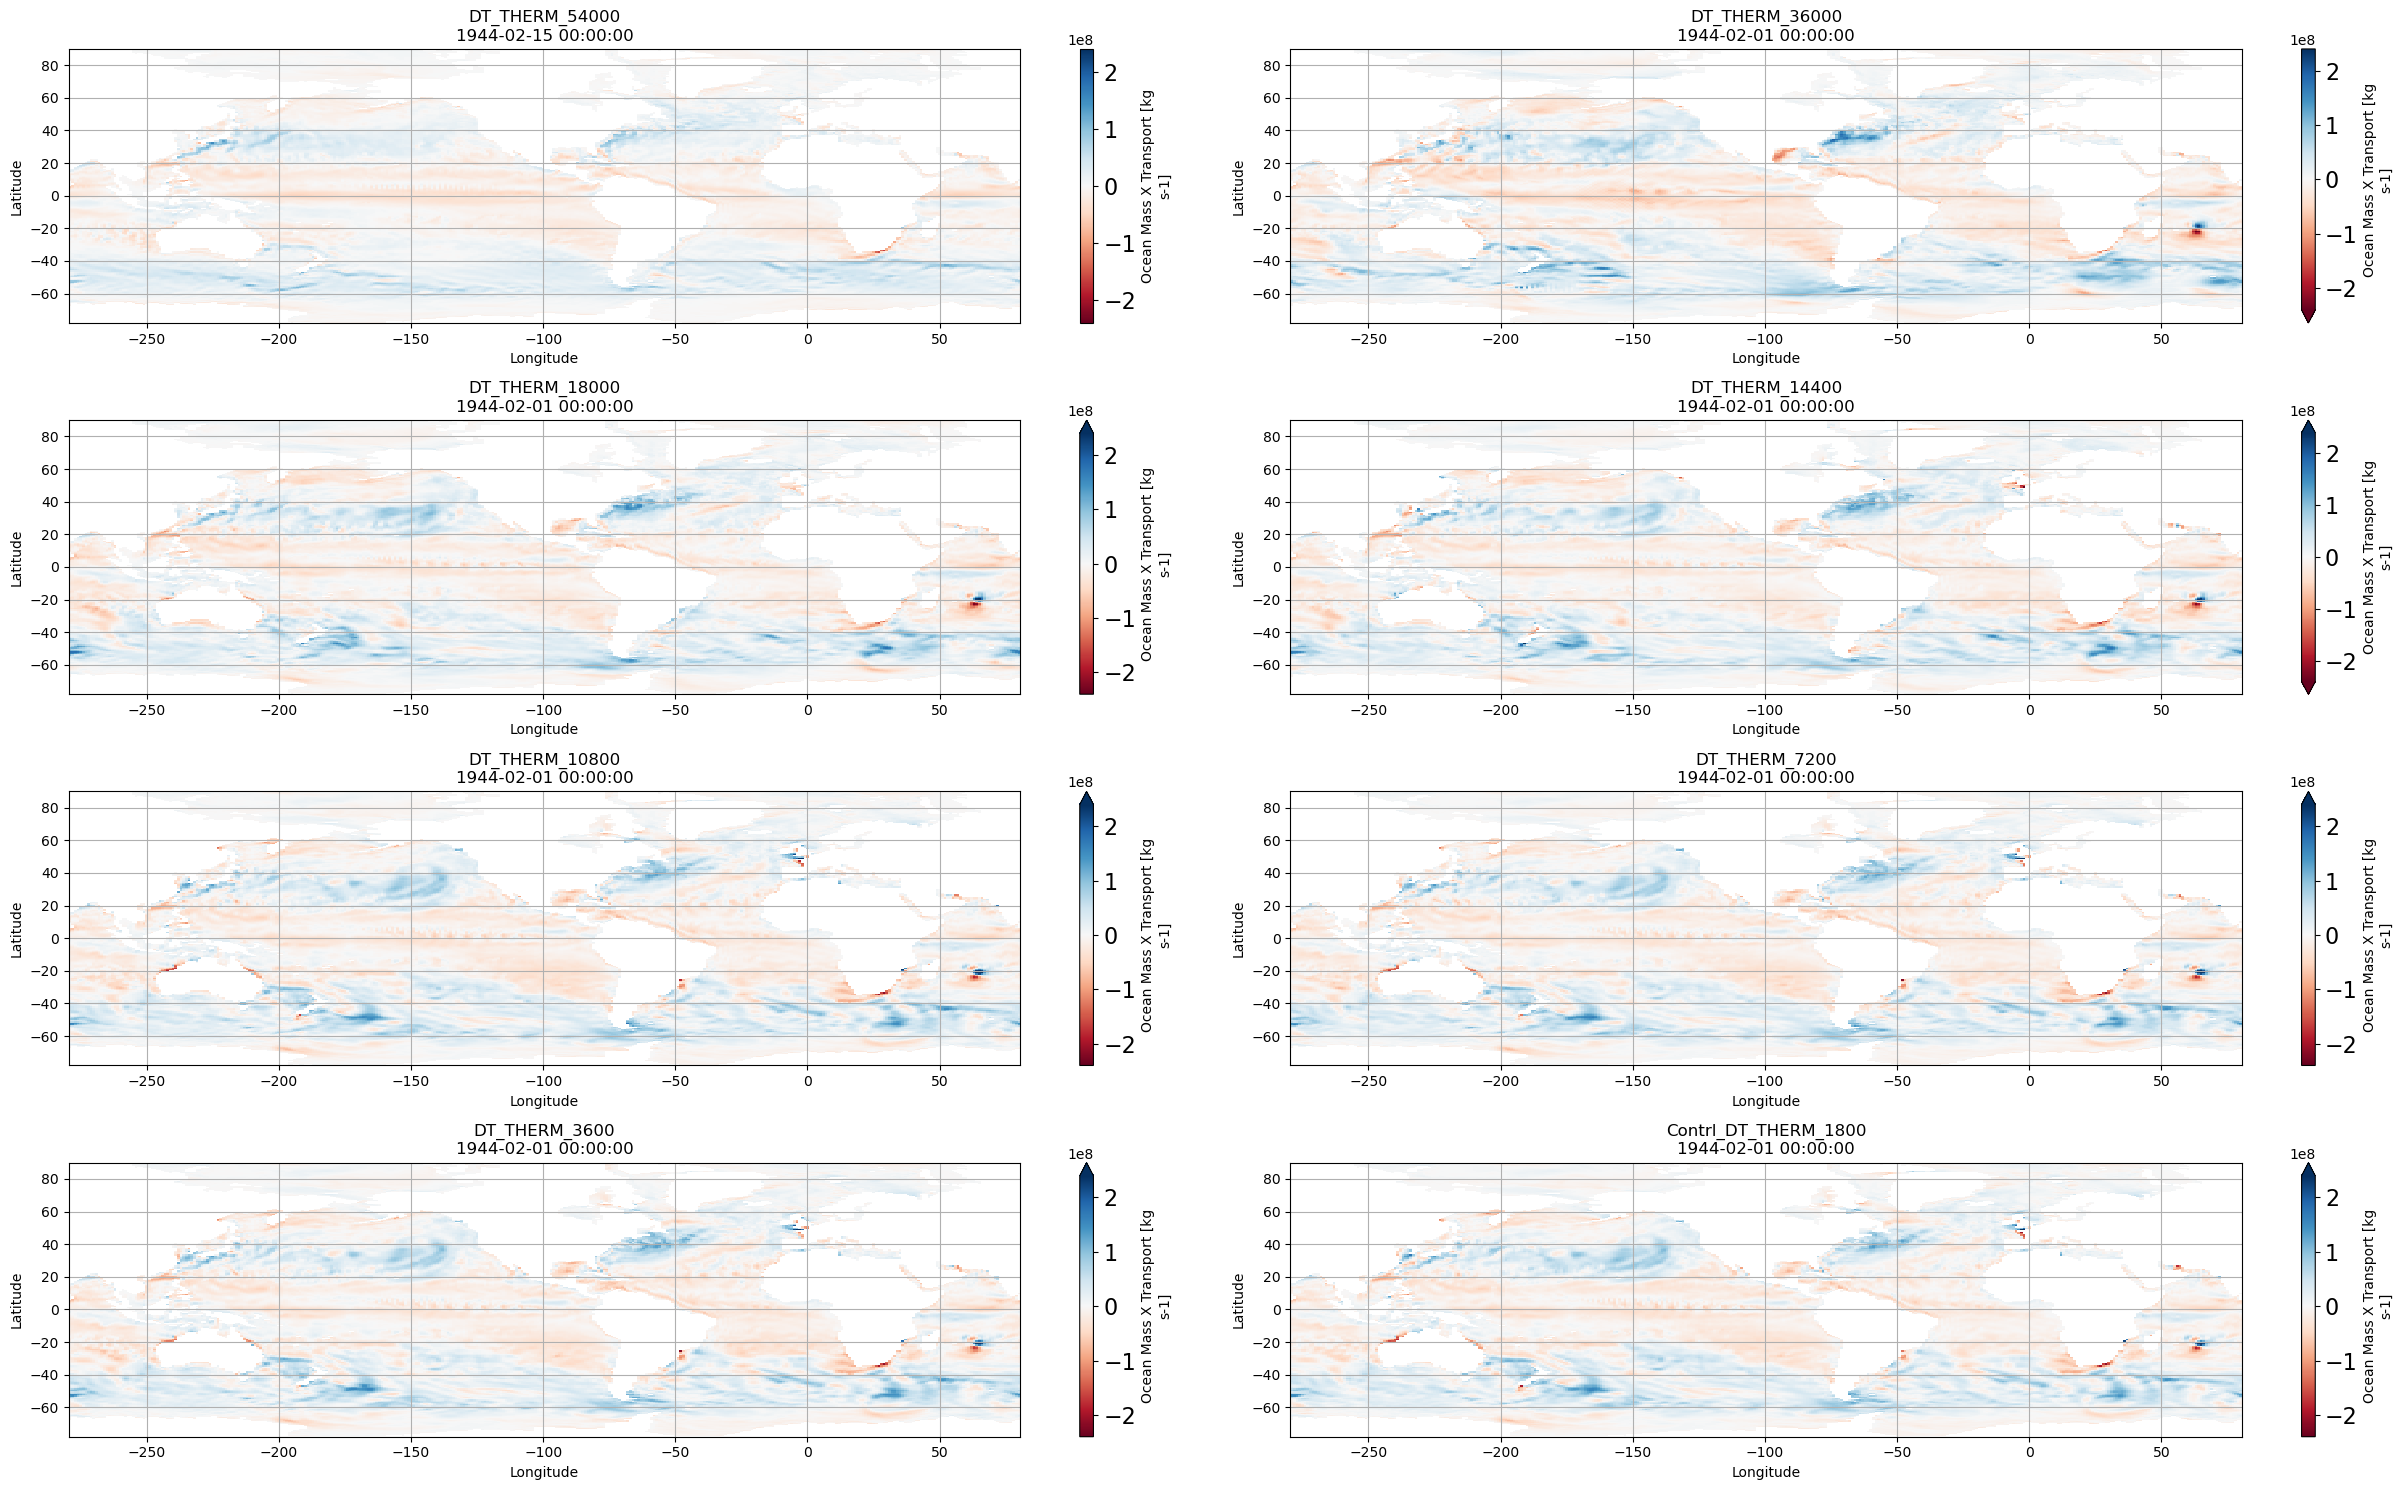

In [42]:
var = 'umo'
common_time = pd.Timestamp('1944-02-01 00:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
tmp_indx = list(range(8))
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d2(datastore_expts, MOM_names_expts, var,depth_level = 0,
       time_selection = 'index', time_index = -1,common_time = common_time,ncols=2,figsize=(25,15),cbar_range=[-2.4e8,2.4e8])

access_om3_mom6_2d_umo_2d_1mon_mean_1900.1mon
<xarray.DataArray 'umo_2d' (time: 12, yh: 300, xq: 360)> Size: 5MB
dask.array<open_dataset-umo_2d, shape=(12, 300, 360), dtype=float32, chunksize=(1, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh       (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * time     (time) object 96B 1900-01-16 12:00:00 ... 1900-12-16 12:00:00
Attributes:
    units:          kg s-1
    long_name:      Ocean Mass X Transport Vertical Sum
    cell_methods:   yh:sum xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  ocean_mass_x_transport_vertical_sum
    interp_method:  none
access_om3_mom6_2d_umo_2d_1mon_mean_1901.1mon
<xarray.DataArray 'umo_2d' (time: 12, yh: 300, xq: 360)> Size: 5MB
dask.array<open_dataset-umo_2d, shape=(12, 300, 360), dtype=float32, chunksize=(1, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  

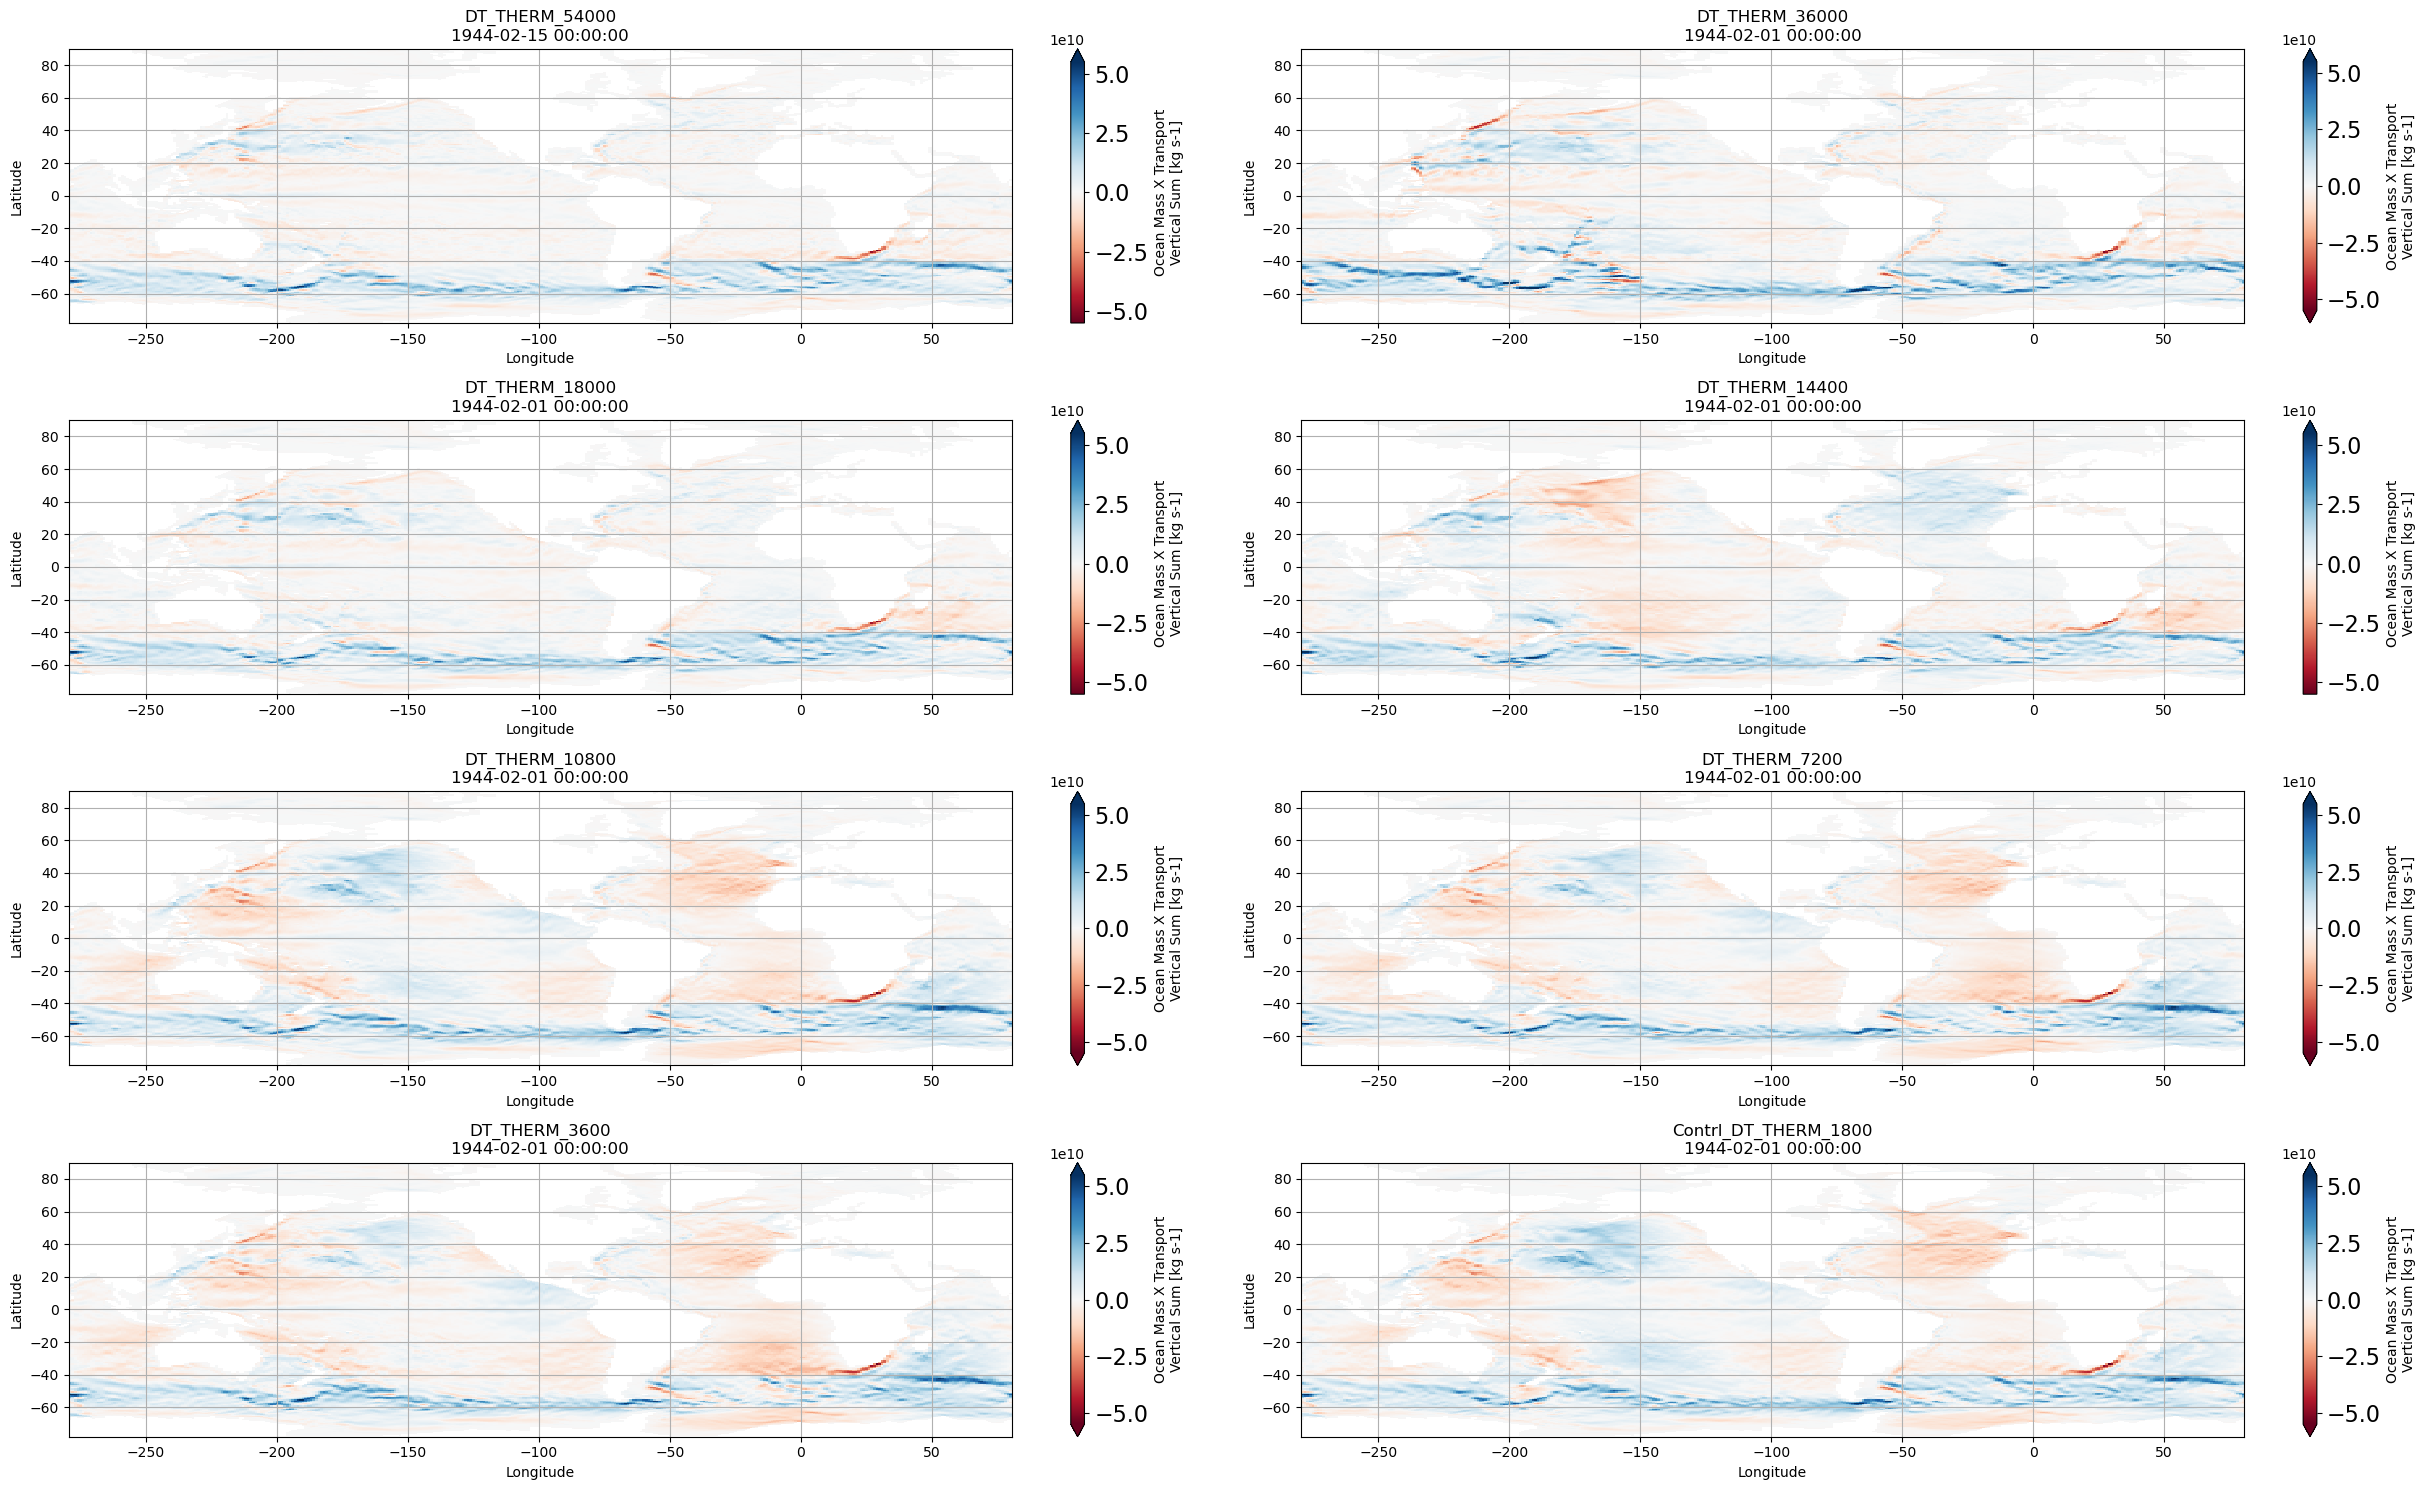

In [7]:
var = 'umo_2d'
common_time = pd.Timestamp('1944-02-01 00:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
tmp_indx = list(range(8))
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d2(datastore_expts, MOM_names_expts, var,depth_level = None,
       time_selection = 'index', time_index = -1,common_time = common_time,ncols=2,figsize=(25,15),cbar_range=[-5.5e10,5.5e10])